# All Data - NLP EDA

In [1]:
# Flag for if you are running this on the sample dataset
sample = False
# Modify this path as needed to run on your machine
sample_path = r'~\Box\STAT 222 Capstone\Intermediate Data\All_Data\all_data_fixed_quarter_dates_sample.csv'

In [2]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
nltk.download('punkt')  # Download NLTK tokenizer
nltk.download('stopwords')  # Download NLTK stop words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ijyli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ijyli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data

In [3]:
# Load in sample csv, or full parquet file
if sample:
    df = pd.read_csv(sample_path)
else:
    df = pd.read_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\All_Data\all_data_fixed_quarter_dates.parquet') 
df

,ticker,fixed_quarter_date,earnings_call_date,Rating,Rating Agency Name,rating_date,CR_source,Rating Rank AAA is 10,Next Rating,Next Rating Date,...,Altman_Z,Change Direction Since Last Fixed Quarter Date,Change Since Last Fixed Quarter Date,Description,Company Name,Sector,Industry Group,Industry,Sub-Industry,Comment
0,AAPL,2014-07-01,2014-04-23,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,6.530889,None,NaN,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
1,AAPL,2014-10-01,2014-07-22,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,4.324703,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
2,AAPL,2015-01-01,2014-10-20,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,6.153503,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
3,AAPL,2015-04-01,2015-01-27,AA,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,...,3.985264,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
4,AAPL,2015-07-01,2015-04-27,AA,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,...,6.295942,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,ZTS,2015-10-01,2015-08-04,BBB,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,...,3.500267,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7330,ZTS,2016-01-01,2015-11-03,BBB,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,...,3.198497,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7331,ZTS,2016-04-01,2016-02-16,BBB,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,...,2.782747,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7332,ZTS,2016-07-01,2016-05-04,BBB,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,...,3.000131,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."


## Print a transcript as it is represented in column 'transcript'

In [5]:
# Print one call string
print(df['transcript'][0])

Operator: Good day, everyone, and welcome to the Apple Incorporated Second Quarter Fiscal Year 2014 Earnings Release Conference Call. Today’s call is being recorded. At this time, for opening remarks and introductions, I would like to turn the call over to Nancy Paxton, Senior Director of Investor Relations. Please go ahead, ma’am.
Nancy Paxton: Thank you. Good afternoon, and thanks to everyone for joining us today. Speaking first today are Apple CEO, Tim Cook, and Vice President and Corporate Controller, Luca Maestri, and they will be joined by CFO, Peter Oppenheimer for the Q&A session with the analysts. Please note that some of the information you’ll hear during our discussion today will consists of forward-looking statements, including without limitation, those regarding revenue, gross margins, operating expenses, other income and expense, stock-based compensation expense, taxes, future products and capital allocation plans. Actual results or trends could differ materially from our

## Transcript Length in Characters

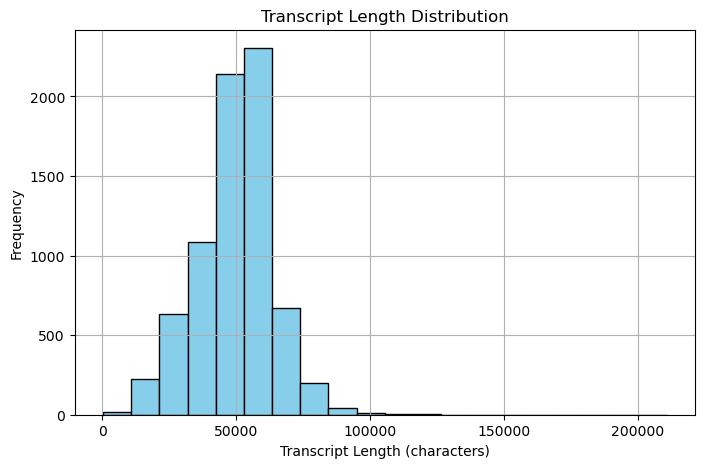

Average transcript length in characters: 49619.00 characters


In [ ]:
# Text Length Distribution
df['char_length'] = df['transcript'].str.len()
plt.figure(figsize=(8, 5))
plt.hist(df['char_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Transcript Length Distribution')
plt.xlabel('Transcript Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Average transcript length in characters: {df['char_length'].mean():.2f} characters")

## Tokenization

In [ ]:
# Tokenize the text
df['transcript_tokens'] = df['transcript'].apply(word_tokenize)
# Words: strip punctuation and make lowercase
# Regex for not being solely punctuation
df['transcript_words'] = df['transcript_tokens'].apply(lambda x: [token for token in x if re.search(r'^[^\w]+$', token) == None])

## Number of Words

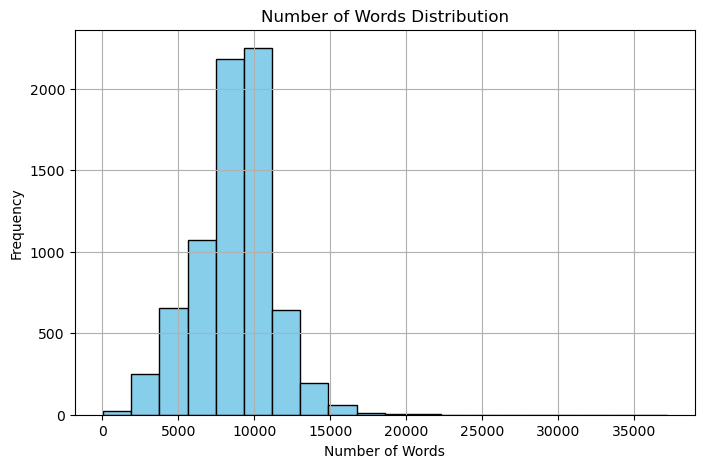

sum stats of call length
count     7334.000000
mean      8688.979547
std       2528.450987
min         36.000000
25%       7218.500000
50%       8956.500000
75%      10195.000000
max      37137.000000
Name: num_words, dtype: float64


In [ ]:
# Count number of words
df['num_words'] = df['transcript_words'].apply(len)

# Figure
plt.figure(figsize=(8, 5))
plt.hist(df['num_words'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number of Words Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('../../../Output/all_data_num_words_distribution.png')
plt.show()

print('sum stats of call length')
print(df['num_words'].describe())

C:\Users\ijyli\AppData\Local\Temp\ipykernel_8536\223812015.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cl_means = df.groupby('Rating').agg({'num_words': 'mean'}).reset_index()


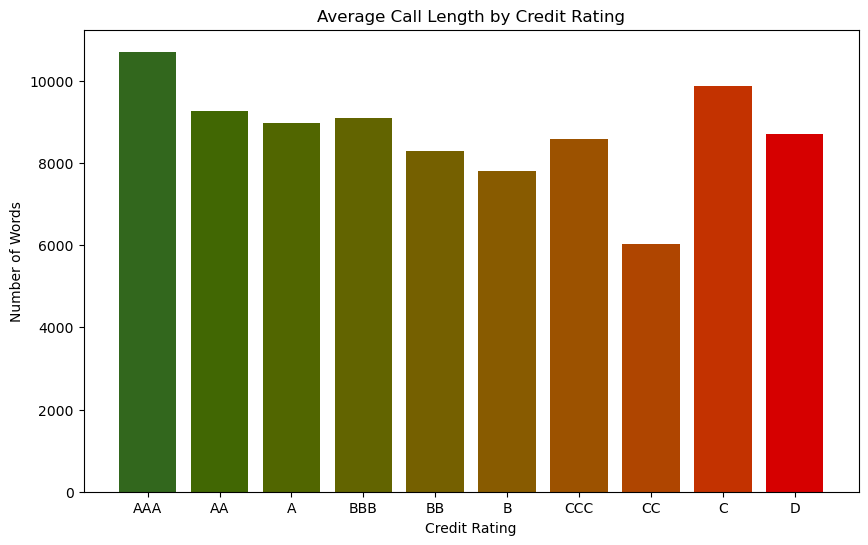

In [ ]:
# Average call length by credit rating

# Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
df['Rating'] = pd.Categorical(df['Rating'], categories=bar_order, ordered=True)
df = df.sort_values('Rating')

# Means of call length by credit rating
cl_means = df.groupby('Rating').agg({'num_words': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(cl_means['Rating'], cl_means['num_words'], color=cl_means['Rating'].map(hex_code_mapper))
plt.title('Average Call Length by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Number of Words')
plt.savefig('../../../Output/all_data_call_length_by_credit_rating.png')
plt.show()

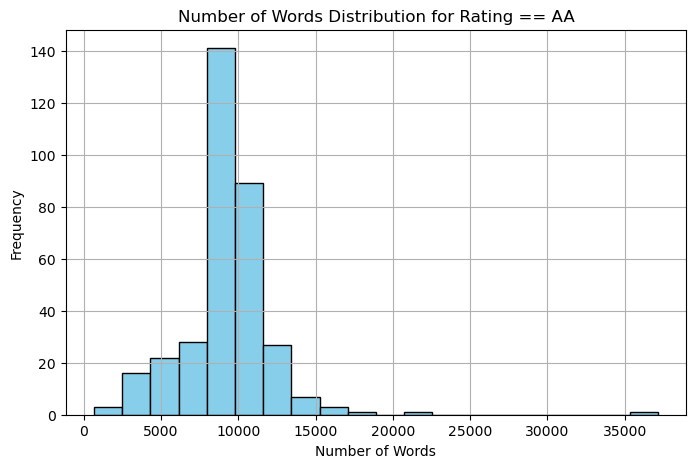

sum stats of call length where Rating == AA
count      339.000000
mean      9272.625369
std       2954.954393
min        663.000000
25%       8296.000000
50%       9365.000000
75%      10362.000000
max      37137.000000
Name: num_words, dtype: float64


In [ ]:
# Distribution of call length where Rating == 'AA'
plt.figure(figsize=(8, 5))
plt.hist(df[df['Rating'] == 'AA']['num_words'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number of Words Distribution for Rating == AA')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('../../../Output/all_data_num_words_distribution_AA.png')
plt.show()

print('sum stats of call length where Rating == AA')
print(df[df['Rating'] == 'AA']['num_words'].describe())

## Sentences

In [ ]:
# Number of sentences
sentences = df['transcript'].apply(nltk.sent_tokenize)
df['num_sentences'] = sentences.apply(len)
print('average number of sentences:', df['num_sentences'].mean())

# Sentence length
print('average sentence length:', (df['num_words'] / df['num_sentences']).mean())

average number of sentences: 444.55576765748566
average sentence length: 19.878721278648534


## Word Frequency

Top 10 most common words:
quarter: 385842
year: 328434
think: 279011
million: 259680
business: 186623
growth: 177911
would: 166516
going: 164158
first: 147133
us: 146036


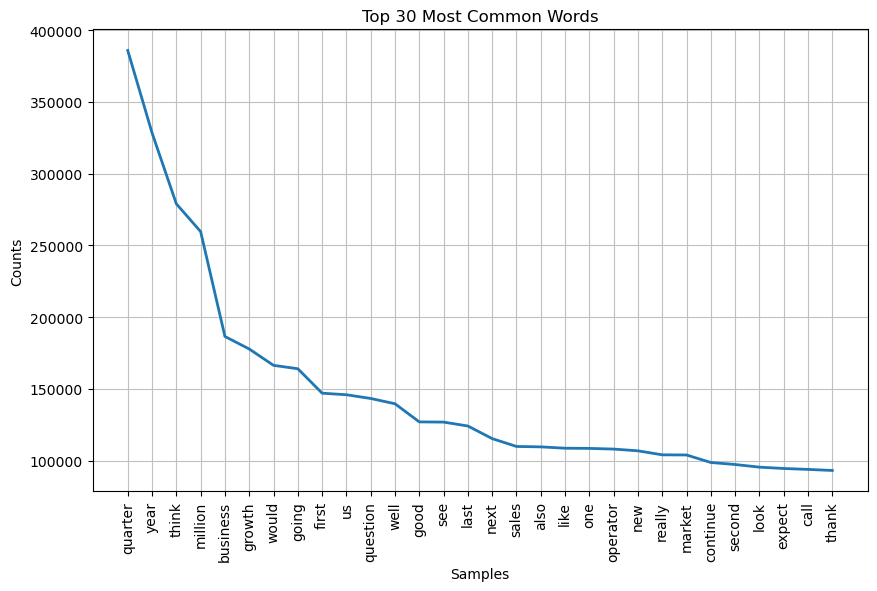

<Axes: title={'center': 'Top 30 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Word Frequency Analysis
all_words = df['transcript_words'].explode().str.lower()

# Remove stop words and require isalpha
stop_words = set(stopwords.words('english'))
all_words = all_words[~all_words.isin(stop_words)]
all_words = all_words[all_words.str.isalpha()]

# Frequency distribution
fdist = FreqDist(all_words)
top_words = fdist.most_common(10)
print("Top 10 most common words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Plot Word Frequency Distribution
plt.figure(figsize=(10, 6))
fdist.plot(30, title='Top 30 Most Common Words')

## Word Clouds for Different Ratings

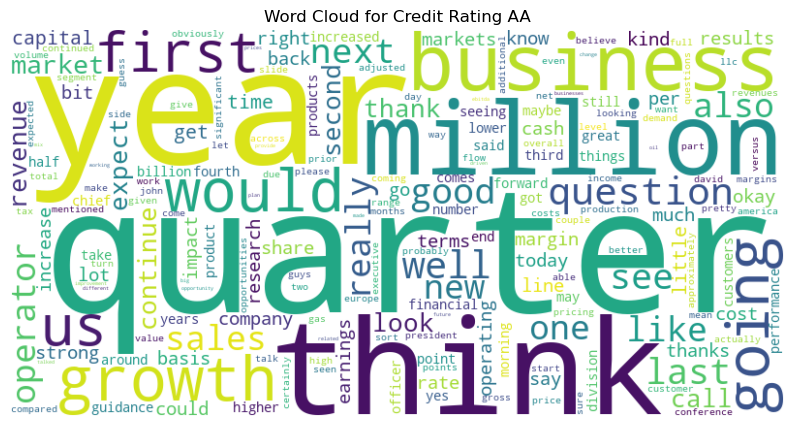

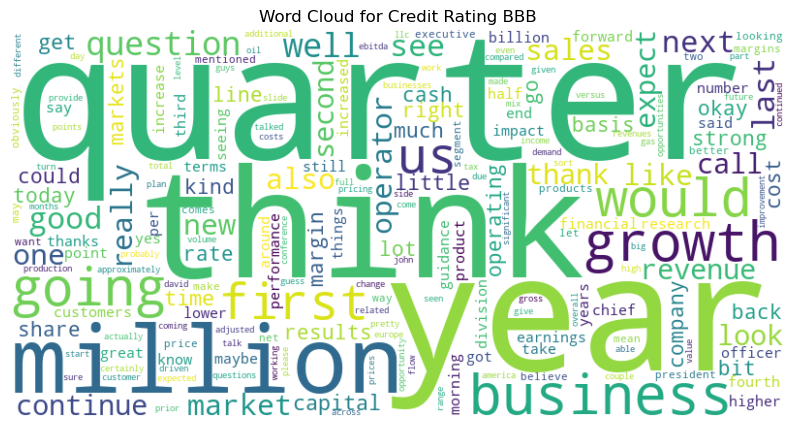

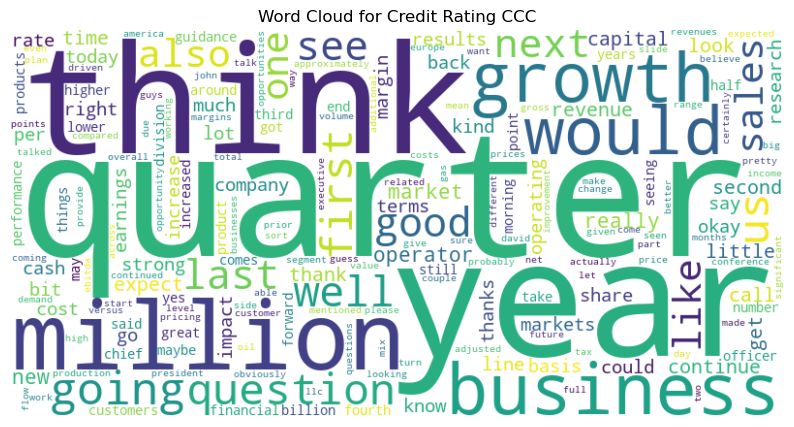

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each credit rating
ratings = ["AA","BBB","CCC"]
for rating in ratings:

    # Filter by rating
    rating_df = df[df['Rating'] == rating]
    # Get words and toss stop words and numbers
    rating_words = df['transcript_words']
    stop_words = set(stopwords.words('english'))
    rating_words = rating_words.apply(lambda t_words: [word.lower() for word in t_words if word.lower() not in stop_words and word.isalpha()])
    
    # Get all words
    all_words = rating_words.explode()

    # Get frequencies
    fdist = FreqDist(all_words)

    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
    
    # Plot Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Credit Rating {rating}')
    plt.show()

We can see from word cloud for credit rating AA, postive words like "growth" are larger when compared to credit rating CCC.

## Thank Yous by Rating

In the past we computed the frequency of all bigrams. We don't have memory for that anymore (at least locally - might try to re-engineer or go on SCF later), but we found "Thank you" was a distinguisher between rating classes. So we will still instead investigate presence of the phrase "Thank You" in the data by rating.

In [ ]:
# Function to count presence of thank you (all caps) in transcript after it's been capitalized
def ty_count(transcript):
    cap_transcript = transcript.upper()
    return cap_transcript.count('THANK YOU')

# Apply to items in df
df['ty_count'] = df['transcript'].apply(ty_count)

In [ ]:
# Means of ty_count by credit rating
ty_means = df.groupby('Rating')['ty_count'].mean().reset_index()
ty_means

C:\Users\ijyli\AppData\Local\Temp\ipykernel_8536\1760052970.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ty_means = df.groupby('Rating')['ty_count'].mean().reset_index()


,Rating,ty_count
0,AAA,15.233577
1,AA,14.861357
2,A,12.474442
3,BBB,12.379758
4,BB,11.700000
5,B,11.520140
6,CCC,10.313514
7,CC,8.571429
8,C,13.062500
9,D,14.000000


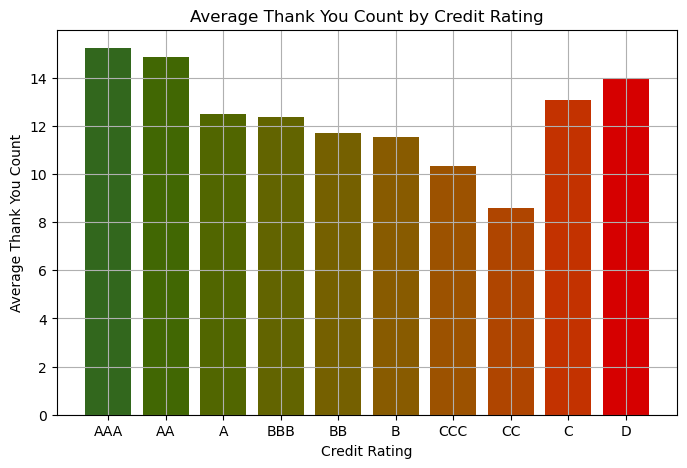

In [ ]:
# Plot: Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x='Rating', height='ty_count', data=ty_means, color=[hex_code_mapper[i] for i in bar_order])
plt.title('Average Thank You Count by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Average Thank You Count')
plt.grid(True)
plt.savefig('../../../Output/all_data_average_thank_you_count.png')
plt.show()

C:\Users\ijyli\AppData\Local\Temp\ipykernel_8536\827508517.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ty_share_means = df.groupby('Rating')['ty_share_of_bigrams'].mean().reset_index()
C:\Users\ijyli\AppData\Local\Temp\ipykernel_8536\827508517.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()])


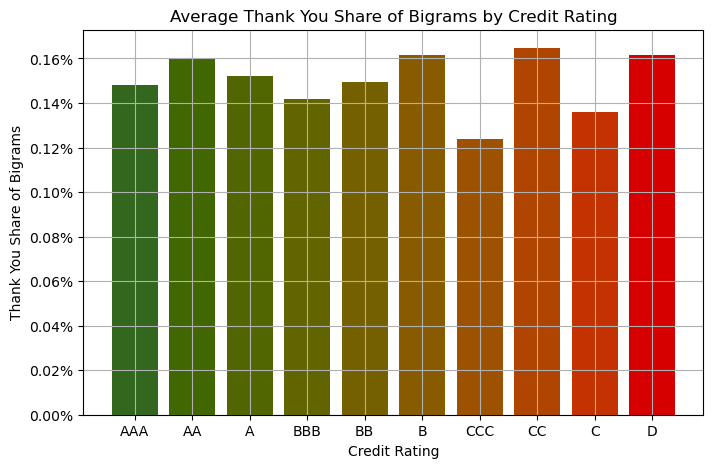

In [ ]:
# Compute number of bigrams
df['num_bigrams'] = df['transcript_words'].apply(lambda x: len(x) - 1)

# Thank you count divided by number of bigrams
df['ty_share_of_bigrams'] = df['ty_count'] / df['num_bigrams']

# Average thank you share of bigrams by credit rating
ty_share_means = df.groupby('Rating')['ty_share_of_bigrams'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x='Rating', height='ty_share_of_bigrams', data=ty_share_means, color=[hex_code_mapper[i] for i in bar_order])
plt.title('Average Thank You Share of Bigrams by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Thank You Share of Bigrams')
# y-axis ticks as percentages
plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid(True)
plt.savefig('../../../Output/all_data_thank_you_share_of_bigrams.png')
plt.show()

Thank yous become far less common as credit rating deteriorates (with exceptions on the low end, but then again, sample size is very small there)!